### 导入模块

In [152]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 数据准备

In [123]:
import pandas as pd
import numpy as np
uniform_data = np.random.rand(10, 12)
data = pd.DataFrame({'x': np.arange(1, 101), 
                     'y': np.random.normal(0, 4, 100)})

# 利用官方数据集 https://github.com/mwaskom/seaborn-data
# titanic = sns.load_dataset("titanic")
# iris = sns.load_dataset("iris")

# 如果下载较慢，或加载失败，可以下载到本地，然后加载本地路径
titanic = sns.load_dataset('titanic',data_home='seaborn-data',cache=True)
iris = sns.load_dataset("iris",data_home='seaborn-data',cache=True)

#### 创建画布和一个子图

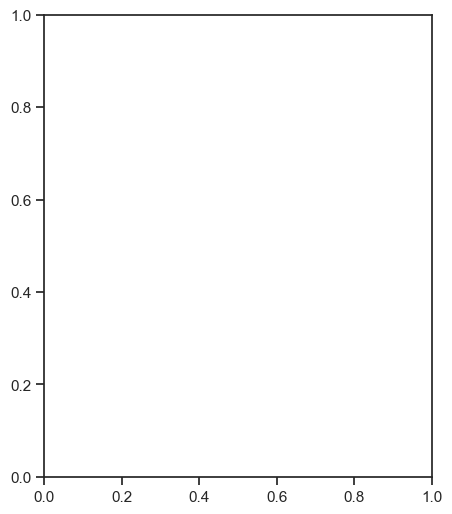

In [124]:
f, ax = plt.subplots(figsize=(5, 6))

### seaborn 样式

In [125]:
sns.set() # 重置seaborn的默认值
sns.set_style("whitegrid")    # 设置matplotlib参数
sns.set_style("ticks",        # 设置matplotlib参数
              {"xtick.major.size": 8, 
               "ytick.major.size": 8})
sns.axes_style("whitegrid")   # 返回一个由参数组成的字典，或使用with来临时设置样式

{'figure.facecolor': 'white',
 'axes.labelcolor': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'xtick.top': False,
 'ytick.right': False,
 'axes.grid': True,
 'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'grid.color': '.8',
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'xtick.bottom': False,
 'ytick.left': False}

#### 设置绘图上下文参数、调色板、Axisgrid对象设置

In [126]:
# # 设置绘图上下文参数
# sns.set_context("talk")        # 设置上下文为“talk”
 
# sns.set_context("notebook",   # 设置上下文为"notebook"，缩放字体元素和覆盖参数映射
#                 font_scale=1.5, 
#                 rc={"lines.linewidth":2.5})

# # 设置调色板
# sns.set_palette("husl",3) # 定义调色板
# sns.color_palette("husl") # 用with使用临时设置调色板
 
# flatui = ["#9b59b6","#3498db","#95a5a6",
#           "#e74c3c","#34495e","#2ecc71"] 
# sns.set_palette(flatui)  # 自定义调色板

# # # 设置Axisgrid对象设置
# # g = sns.FacetGrid(titanic, col="sex", row="class", margin_titles=True)
# # g.despine(left=True)      # 隐藏左边线 
# # g.set_ylabels("Survived") # 设置y轴的标签
# # g.set_xticklabels(rotation=45)      # 为x设置刻度标签
# # g.set_axis_labels("Survived","Sex") # 设置轴标签
# # # h.set(xlim=(0,5),         # 设置x轴和y轴的极限和刻度
# # #       ylim=(0,5),
# # #       xticks=[0,2.5,5],
# # #       yticks=[0,2.5,5])

# # plt设置
# plt.title("A Title")    # 添加图标题
# plt.ylabel("Survived")  # 调整y轴标签
# plt.xlabel("Sex")       # 调整x轴的标签
# plt.ylim(0,100)         # 调整y轴的上下限
# plt.xlim(0,10)          # 调整x轴的限制
# plt.setp(ax,yticks=[0,5]) # 调整绘图属性
# plt.tight_layout()      # 次要情节调整参数

# # 展示或者保存图片
# # plt.show()
# # plt.savefig("foo.png")
# # plt.savefig("foo.png",   # 保存透明图片
# #             transparent=True)
 
# # plt.cla()   # 清除轴
# # plt.clf()   # 清除整个图片
# # plt.close() # 关闭窗口

### Seaborn绘图

#### **relplot**

这是一个图形级别的函数，它用散点图和线图两种常用的手段来表现统计关系。hue, col分类依据,size将产生不同大小的元素的变量分组,aspect长宽比,legend_full每组均有条目。

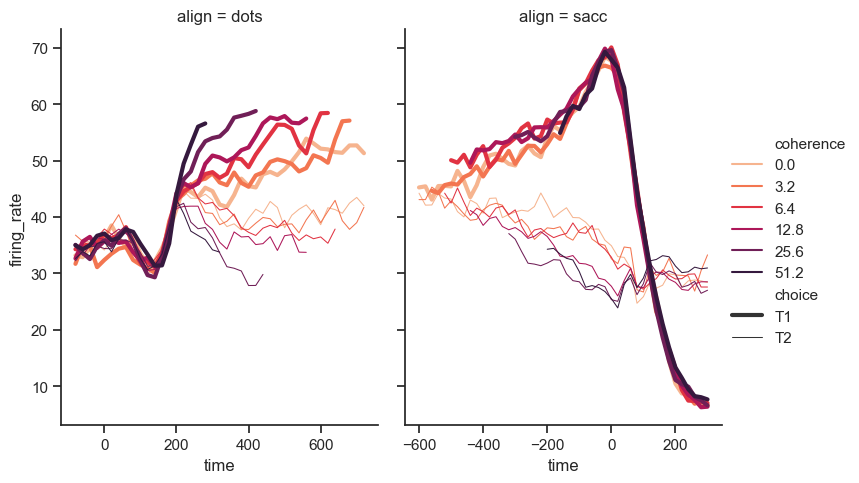

In [127]:
dots = sns.load_dataset('dots',
            data_home='seaborn-data',
            cache=True)
# 将调色板定义为一个列表，以指定精确的值
palette = sns.color_palette("rocket_r")
 
# 在两个切面上画线
sns.relplot(
    data=dots,
    x="time", y="firing_rate",
    hue="coherence", size="choice", 
    col="align", kind="line", 
    size_order=["T1", "T2"], palette=palette,
    height=5, aspect=.75, 
    facet_kws=dict(sharex=False),
)

#### **散点图scatterplot**

<Axes: xlabel='carat', ylabel='price'>

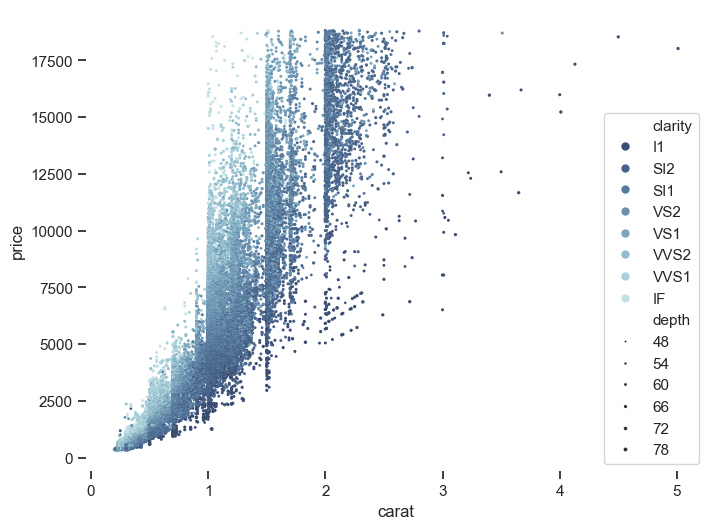

In [128]:
diamonds = sns.load_dataset('diamonds',data_home='seaborn-data',cache=True)
 
# 绘制散点图，同时指定不同的点颜色和大小
f, ax = plt.subplots(figsize=(8, 6))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=diamonds, ax=ax)

#### **折线图lineplot**

seaborn 里的lineplot函数所传数据必须为一个pandas数组

<Axes: xlabel='timepoint', ylabel='signal'>

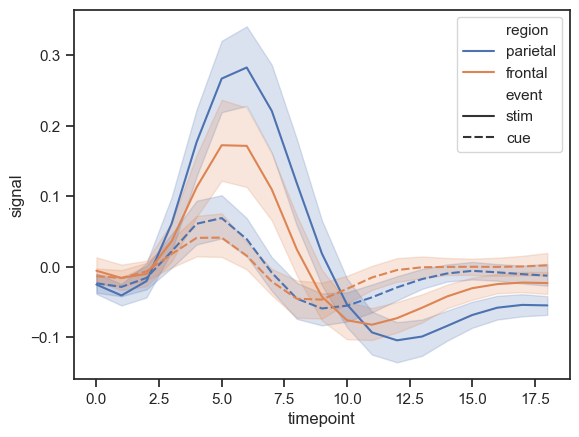

In [129]:
fmri = sns.load_dataset('fmri',data_home='seaborn-data',cache=True)
# 绘制不同事件和地区的响应
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

#### **成组的柱状图catplot**

分类图表的接口，通过指定kind参数可以画出以下八种图
 - stripplot 分类散点图
 - swarmplot 能够显示分布密度的分类散点图
 - boxplot 箱图
 - violinplot 小提琴图
 - boxenplot 增强箱图
 - pointplot 点图
 - barplot 条形图
 - countplot 计数图

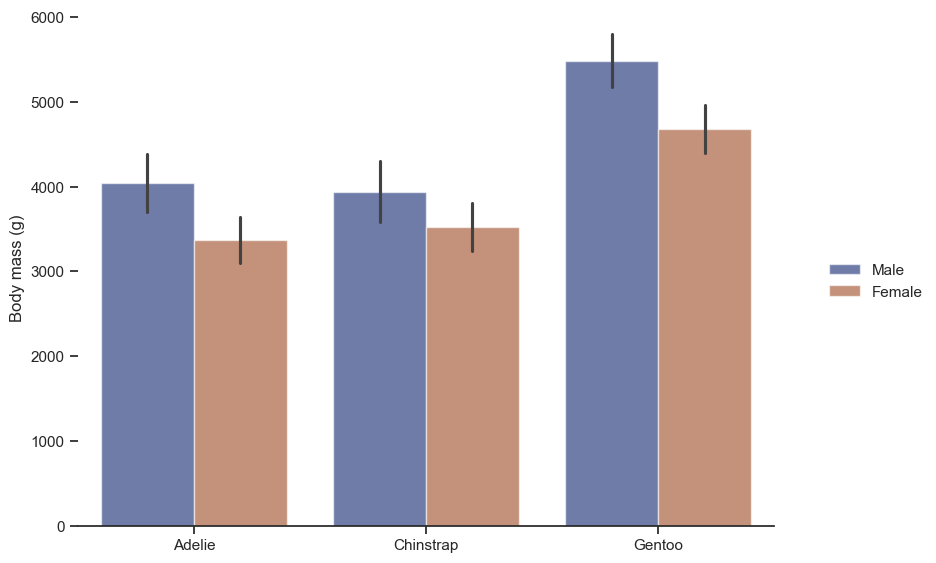

In [130]:
penguins = sns.load_dataset('penguins',data_home='seaborn-data',cache=True)
# 按物种和性别画一个嵌套的引线图
g = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    errorbar="sd", palette="dark", alpha=.6, height=6)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")
g.fig.set_size_inches(10,6) # 设置画布大小

#### **分类散点图stripplot**

<Axes: xlabel='species', ylabel='petal_length'>

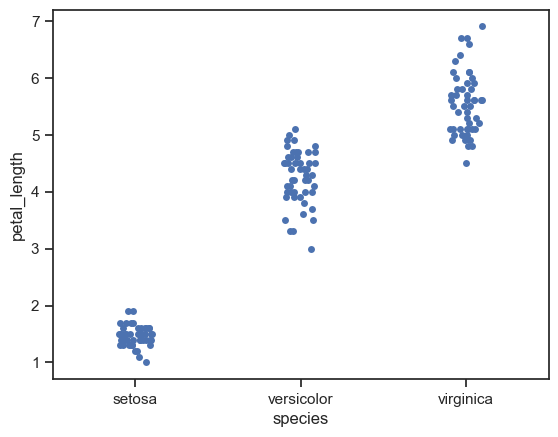

In [131]:
sns.stripplot(x="species", 
              y="petal_length", 
              data=iris)

#### **无重叠点的分类散点图swarmplot**

能够显示分布密度的分类散点图。

<Axes: xlabel='species', ylabel='petal_length'>

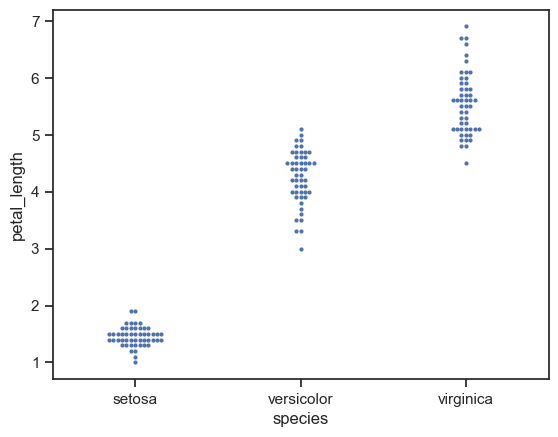

In [132]:
sns.swarmplot(x="species",
              y="petal_length",
              data=iris, size=3) # 额外设置点的大小，能够完整显示内容

#### **柱状图barplot**

用散点符号显示点估计和置信区间

<Axes: xlabel='sex', ylabel='survived'>

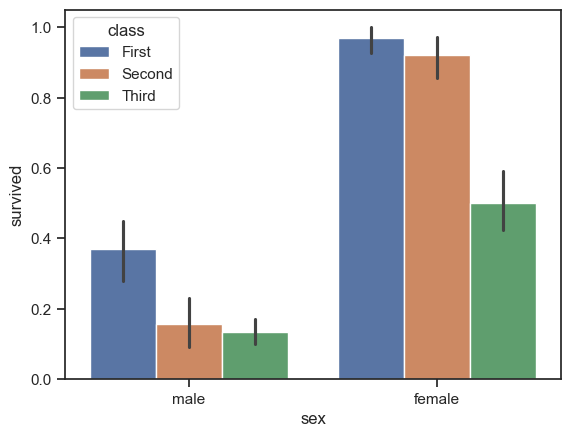

In [133]:
sns.barplot(x="sex",
            y="survived",
            hue="class",
            data=titanic)

#### **计数图countplot**

<Axes: xlabel='deck', ylabel='count'>

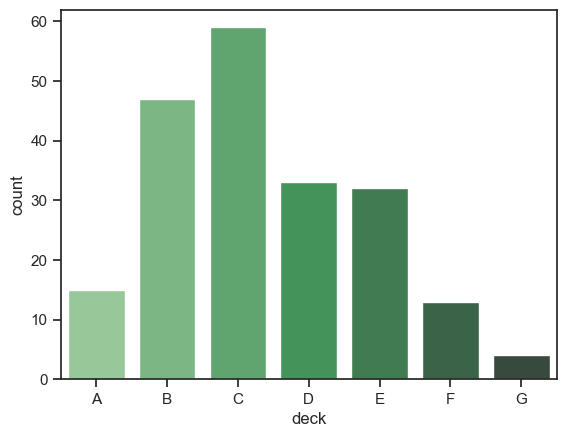

In [134]:
# 显示观测次数
sns.countplot(x="deck",
              hue="deck", legend=False, # 一定要写标签，但是可以用legend=False取消显示
              data=titanic,
              palette="Greens_d")

#### **点图pointplot**

用矩形条显示点估计和置信区间

<Axes: xlabel='class', ylabel='survived'>

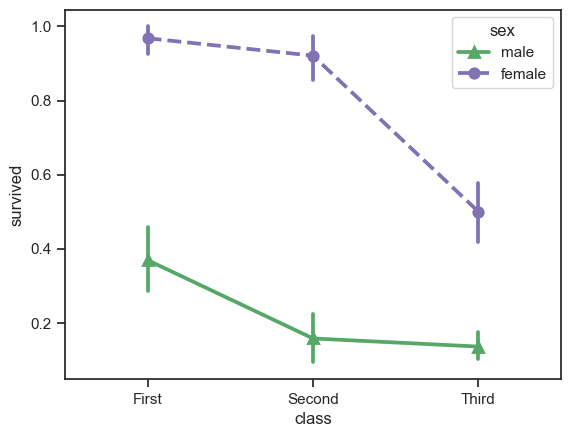

In [135]:
sns.pointplot(x="class",
              y="survived",
              hue="sex",
              data=titanic,
              palette={"male":"g", "female":"m"},
              markers=["^","o"],
              linestyles=["-","--"])

#### **箱线图boxplot**

箱线图（Box-plot）又称为盒须图、盒式图或箱线图，是一种用作显示一组数据分散情况资料的统计图。它能显示出一组数据的最大值、最小值、中位数及上下四分位数。

<Axes: xlabel='alive', ylabel='age'>

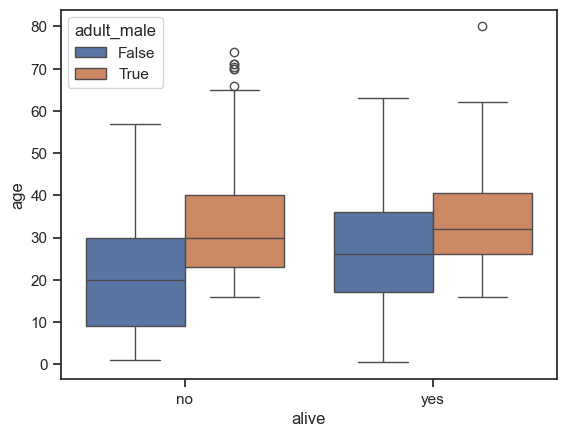

In [136]:
sns.boxplot(x="alive",
            y="age",
            hue="adult_male", # hue分类依据
            data=titanic)

<Axes: >

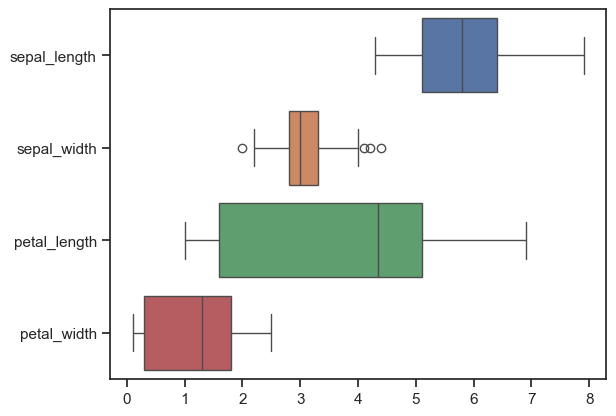

In [137]:
# 绘制宽表数据箱型图
sns.boxplot(data=iris, orient="h")

#### **增强箱图boxenplot**

boxenplot是为更大的数据集绘制增强的箱型图。这种风格的绘图最初被命名为“信值图”，因为它显示了大量被定义为“置信区间”的分位数。它类似于绘制分布的非参数表示的箱形图，其中所有特征对应于实际观察的数值点。通过绘制更多分位数，它提供了有关分布形状的更多信息，特别是尾部数据的分布。

C:\Users\31561\AppData\Local\Temp\ipykernel_30032\63885774.py:3: FutureWarning: 

The `scale` parameter has been renamed to `width_method` and will be removed in v0.15. Pass `width_method='linear' for the same effect.
  sns.boxenplot(x="clarity", y="carat",


<Axes: xlabel='clarity', ylabel='carat'>

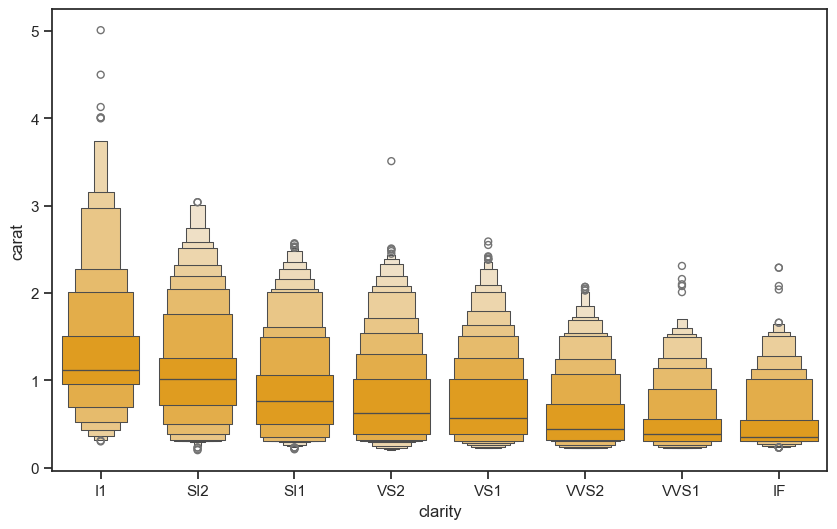

In [138]:
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
f, ax = plt.subplots(figsize=(10, 6))
sns.boxenplot(x="clarity", y="carat",
              color="orange", order=clarity_ranking,
              scale="linear", data=diamonds,ax=ax)

#### **小提琴图violinplot**

violinplot与boxplot扮演类似的角色，它显示了定量数据在一个（或多个）分类变量的多个层次上的分布，这些分布可以进行比较。不像箱形图中所有绘图组件都对应于实际数据点，小提琴绘图以基础分布的核密度估计为特征。

<Axes: xlabel='age', ylabel='sex'>

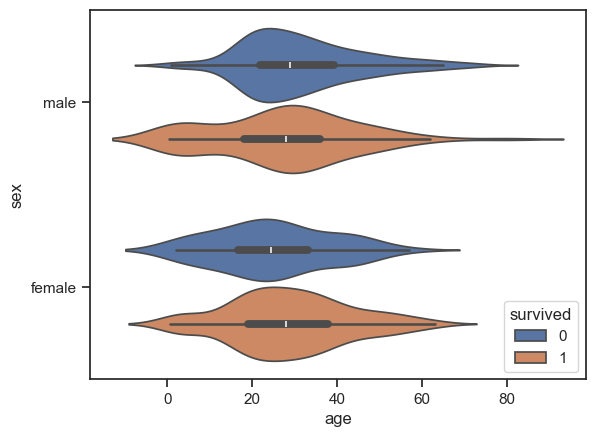

In [139]:
sns.violinplot(x="age", 
               y="sex", 
               hue="survived", 
               data=titanic)

#### **绘制条件关系的网格FacetGrid**

FacetGrid是一个绘制多个图表（以网格形式显示）的接口。

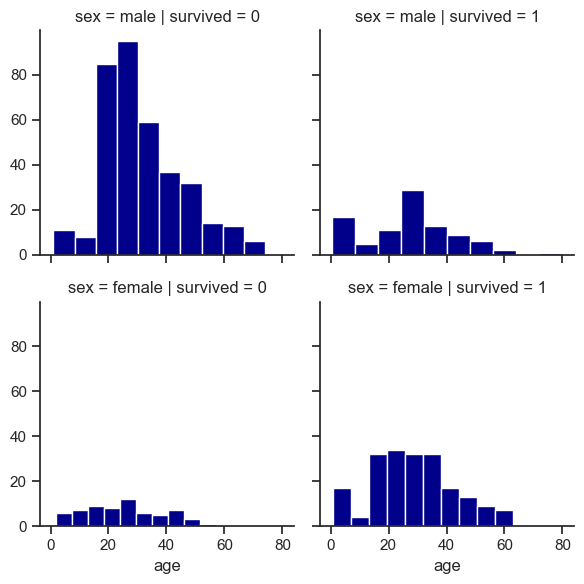

In [168]:
g = sns.FacetGrid(titanic,
                  col="survived",
                  row="sex")
g = g.map(plt.hist,"age", color="darkblue")

#### **极坐标网络FacetGrid**

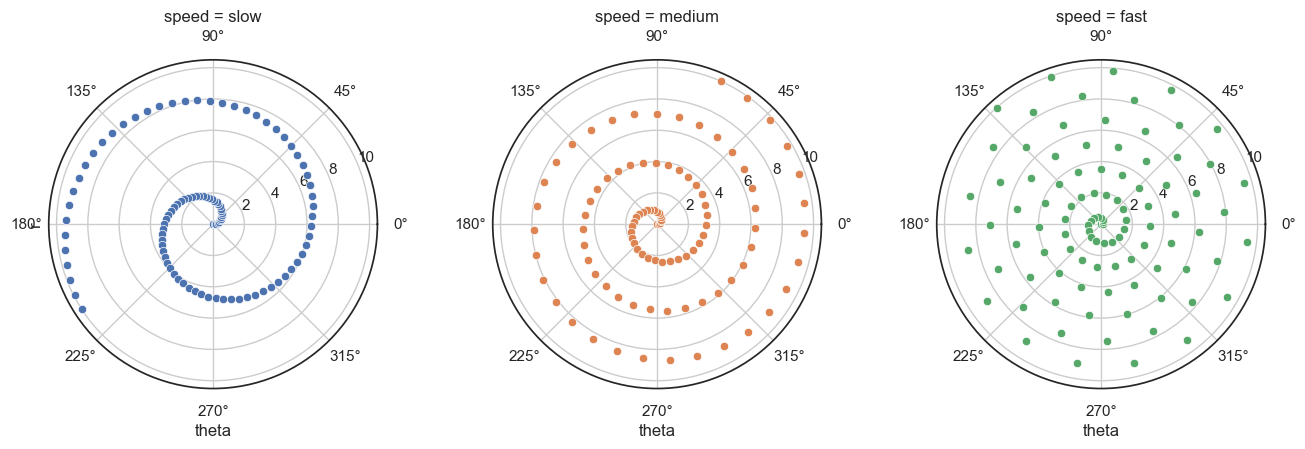

In [141]:
# 生成一个例子径向数据集
r = np.linspace(0, 10, num=100)
df = pd.DataFrame({'r': r, 'slow': r, 'medium': 2 * r, 'fast': 4 * r})
 
# 将dataframe转换为长格式或“整齐”格式
df = pd.melt(df, id_vars=['r'], var_name='speed', value_name='theta')
 
# 用极投影建立一个坐标轴网格
g = sns.FacetGrid(df, col="speed", hue="speed",
                  subplot_kws=dict(projection='polar'), height=4.5,
                  sharex=False, sharey=False, despine=False)
 
# 在网格的每个轴上画一个散点图
g.map(sns.scatterplot, "theta", "r")

#### **成对关系网格图PairGrid**

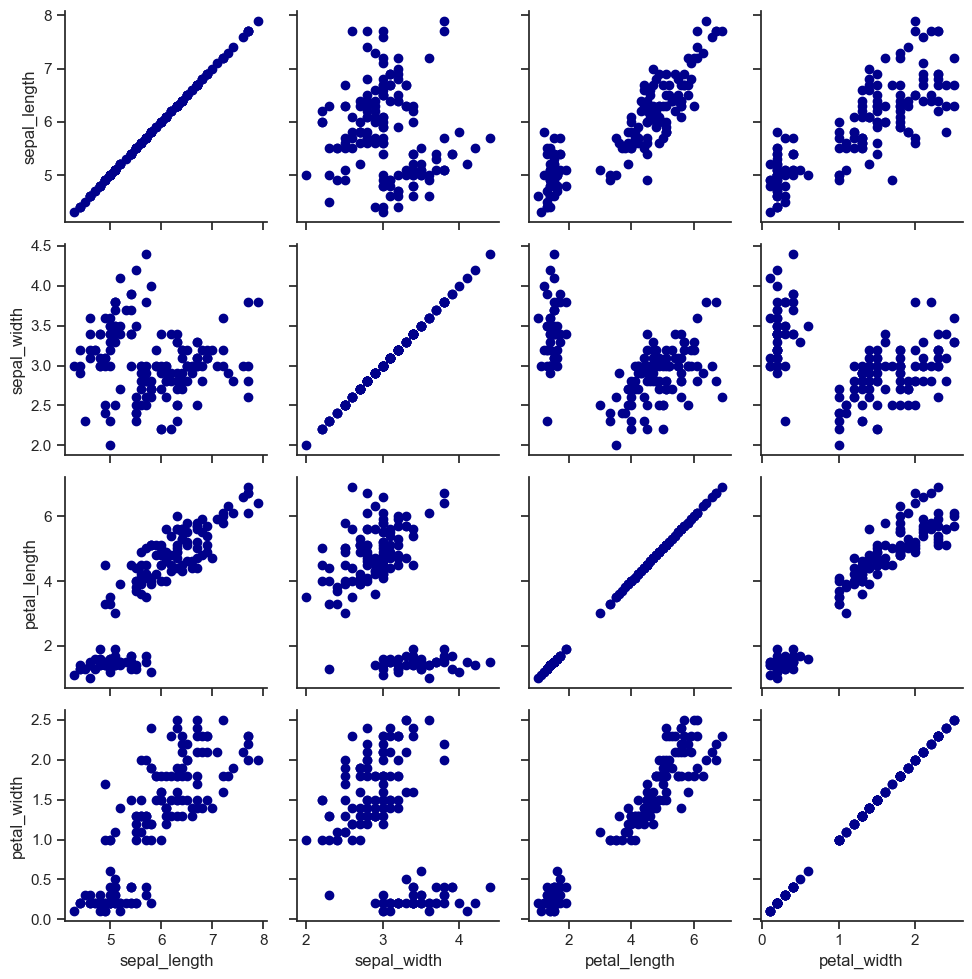

In [162]:
h = sns.PairGrid(iris)
h = h.map(plt.scatter, color="darkblue")

#### **双变量分布**

变量关系组图

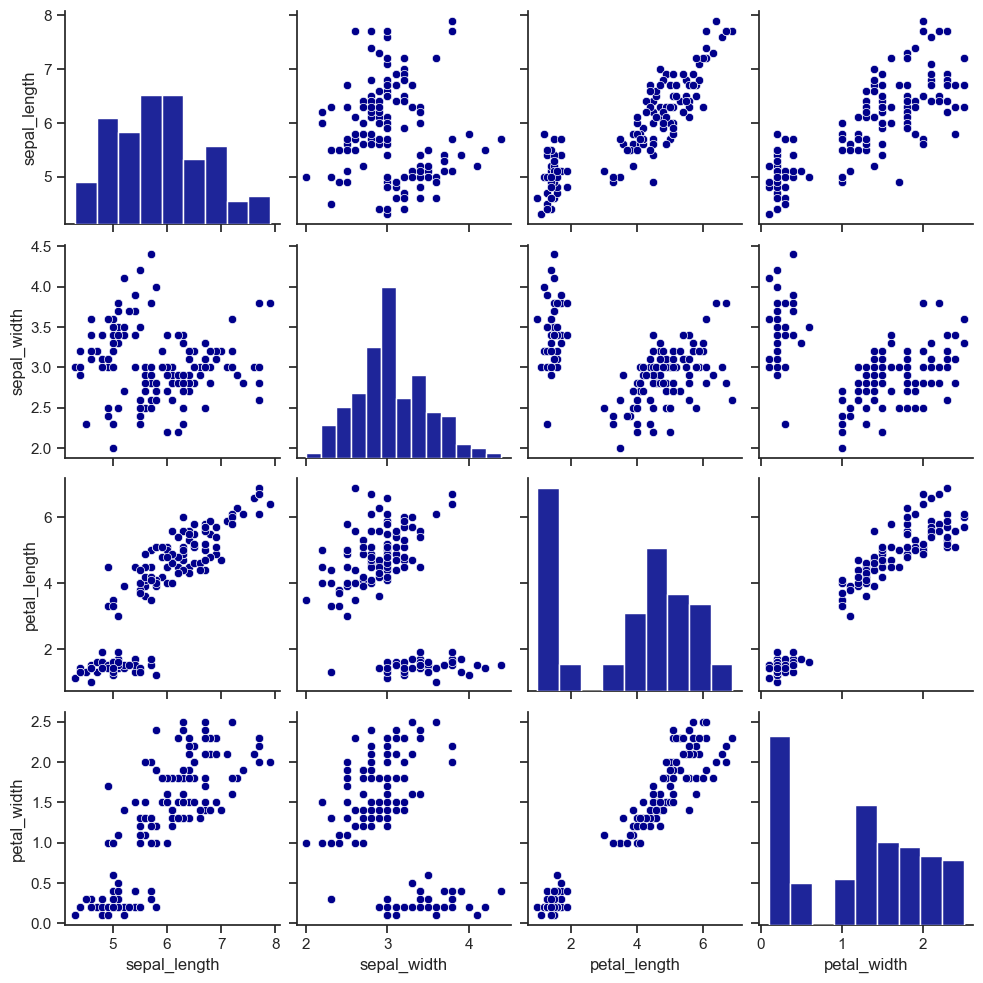

In [192]:
a = sns.pairplot(iris) # 绘制双变量分布

# map_offdiag：对非对角线的子图应用绘图函数

# map_diag：对对角线上的子图应用绘图函数，这里使用 sns.histplot（直方图）

a.map_offdiag(sns.scatterplot, color="darkblue")  # seaborn 绘制的散点图，颜色设置成蓝色
a.map_diag(sns.histplot, color="darkblue")  # seaborn 绘制的直方图，颜色设置成蓝色



#### **双变量图的网格与边缘单变量图JointGrid**

'\nimport seaborn as sns\nimport matplotlib.pyplot as plt\nimport pandas as pd\nimport numpy as np\n\n# 示例数据\nnp.random.seed(42)\ndata = pd.DataFrame({\n    "x": np.random.normal(0, 1, 200),\n    "y": np.random.normal(0, 1, 200)\n})\n\n# 设置全局主题\nsns.set_theme()\n\n# 创建 JointGrid 对象\ni = sns.JointGrid(x="x", y="y", data=data)\n\n# 在主图中绘制双变量图（回归图），并设置颜色\ni = i.plot(sns.regplot, sns.histplot, color="darkblue")  \n\n# 在边缘单变量图中绘制直方图，并设置颜色\ni.plot_marginals(sns.histplot, kde=True, color="darkblue")\n\n# 显示图形\nplt.show()\n\n'

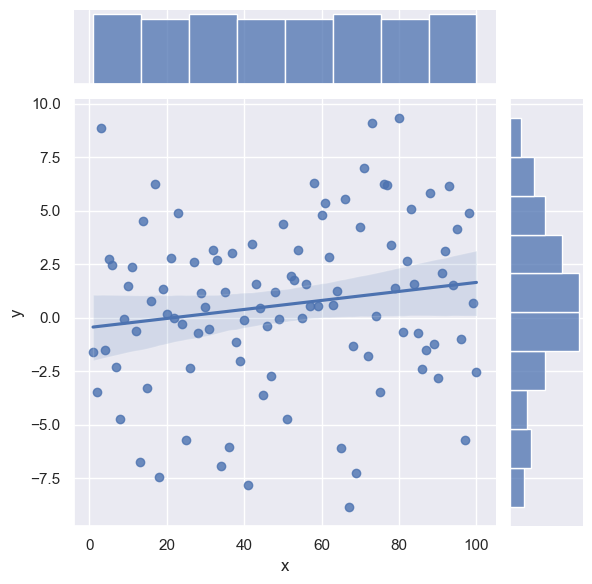

In [205]:
# 设置全局主题颜色
sns.set_theme()

i = sns.JointGrid(x="x", # 双变量图的网格与边缘单变量图
                  y="y",
                  data=data, )
i = i.plot(sns.regplot, sns.histplot) # 绘制双变量图的核密度估计图
"""
sns.set_theme()
g = sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg", color="darkblue")
"""

# i.plot_marginals(sns.histplot, kde=True, color="darkblue") # 单变量图的函数
# sns.distplot 已经弃用，使用 sns.histplot 替代
# regplot 没有kde参数，所以需要给histplot单独设置kde

"""
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 示例数据
np.random.seed(42)
data = pd.DataFrame({
    "x": np.random.normal(0, 1, 200),
    "y": np.random.normal(0, 1, 200)
})

# 设置全局主题
sns.set_theme()

# 创建 JointGrid 对象
i = sns.JointGrid(x="x", y="y", data=data)

# 在主图中绘制双变量图（回归图），并设置颜色
i = i.plot(sns.regplot, sns.histplot, color="darkblue")  

# 在边缘单变量图中绘制直方图，并设置颜色
i.plot_marginals(sns.histplot, kde=True, color="darkblue")

# 显示图形
plt.show()

"""

#### **二维分布jointplot**

用于两个变量的画图，将两个变量的联合分布形态可视化出来往往会很有用。在seaborn中，最简单的实现方式是使用jointplot函数，它会生成多个面板，不仅展示了两个变量之间的关系，也在两个坐标轴上分别展示了每个变量的分布。

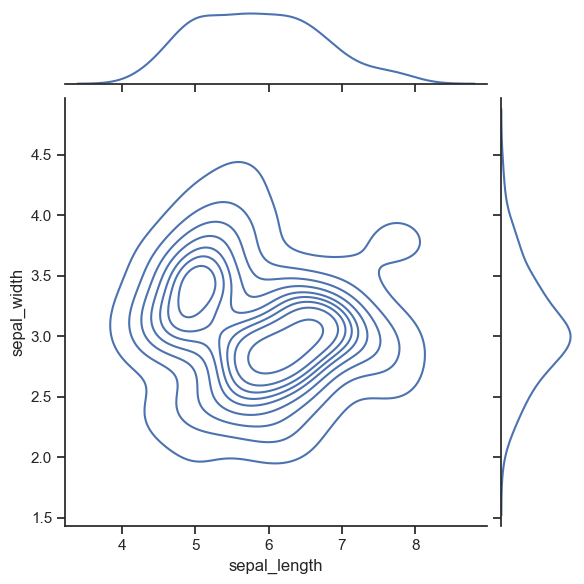

In [148]:
sns.jointplot(x="sepal_length", # 绘制二维分布
              y="sepal_width",  # x和y轴需要给上具体的内容
              data=iris, 
              kind="kde" # kind="hex" 就是两个坐标轴上显示直方图
              )

#### **多元双变量核密度估计kdeplot**

核密度估计(kernel density estimation)是在概率论中用来估计未知的密度函数，属于非参数检验方法之一。通过核密度估计图可以比较直观的看出数据样本本身的分布特征。

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

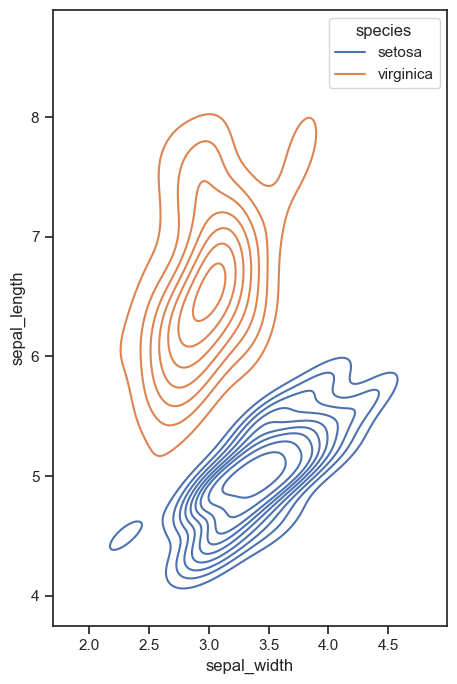

In [150]:
f, ax = plt.subplots(figsize=(8 ,8))
ax.set_aspect("equal")

# 绘制等高线图来表示每一个二元密度
sns.kdeplot(
    data=iris.query("species != 'versicolor'"),
    x="sepal_width",
    y="sepal_length",
    hue="species",
    thresh=.1,
    )

#### **多变量直方图histplot**

绘制单变量或双变量直方图以显示数据集的分布

可以添加使用核密度估计获得平滑曲线，类似于看的plot()函数

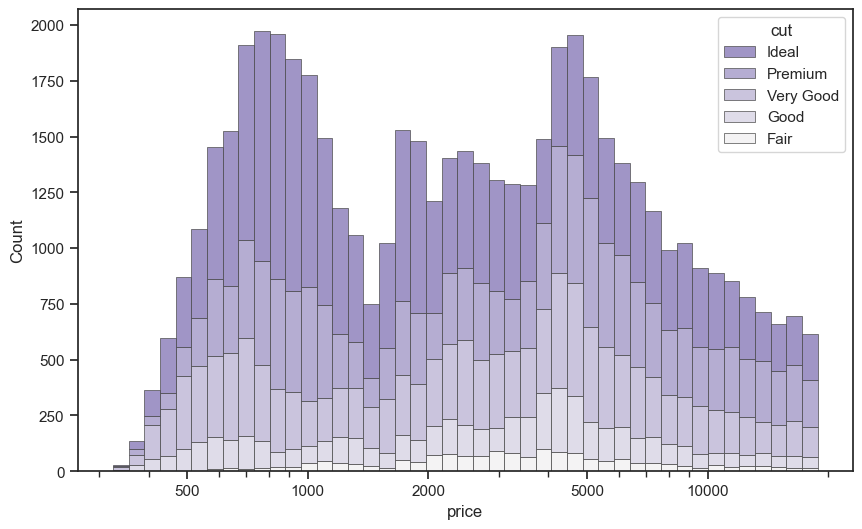

In [153]:
f, ax = plt.subplots(figsize=(10, 6))
sns.histplot(
    diamonds,
    x="price", hue="cut",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])

#### **单变量分布图displot**

在seaborn中想要对单变量分布进行快速了解最方便的就是使用displot函数，默认情况下它将绘制一个直方图，并且可以同时画出核密度估计(KDE)。[distplot已经弃用]

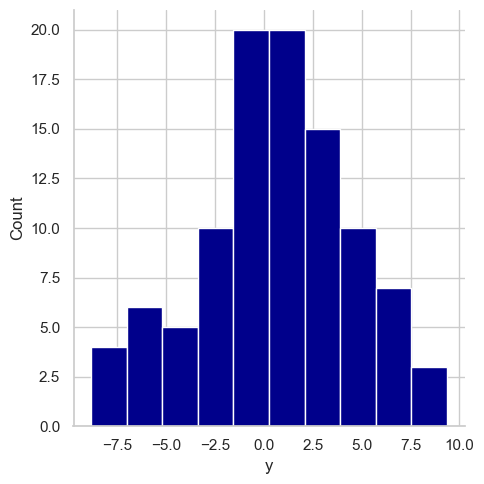

In [198]:
plot = sns.displot(data.y, 
                    kde=False, 
                    color='darkblue',
                    alpha = 1) # alpha指的是图像的透明度

#### **矩阵图heatmap**

利用热力图可以看数据表里多个特征两两的相似度

<Axes: >

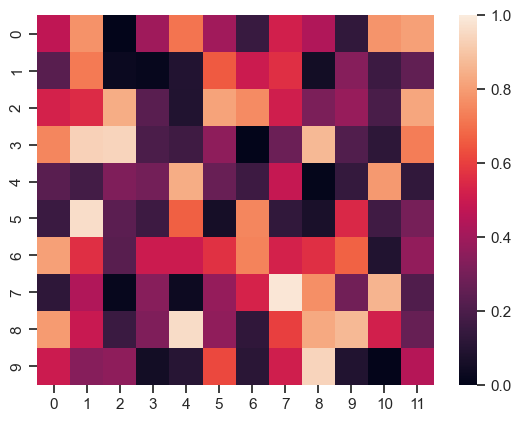

In [157]:
sns.heatmap(uniform_data, vmin=0, vmax=1)

#### **分层聚集的热图clustermap**

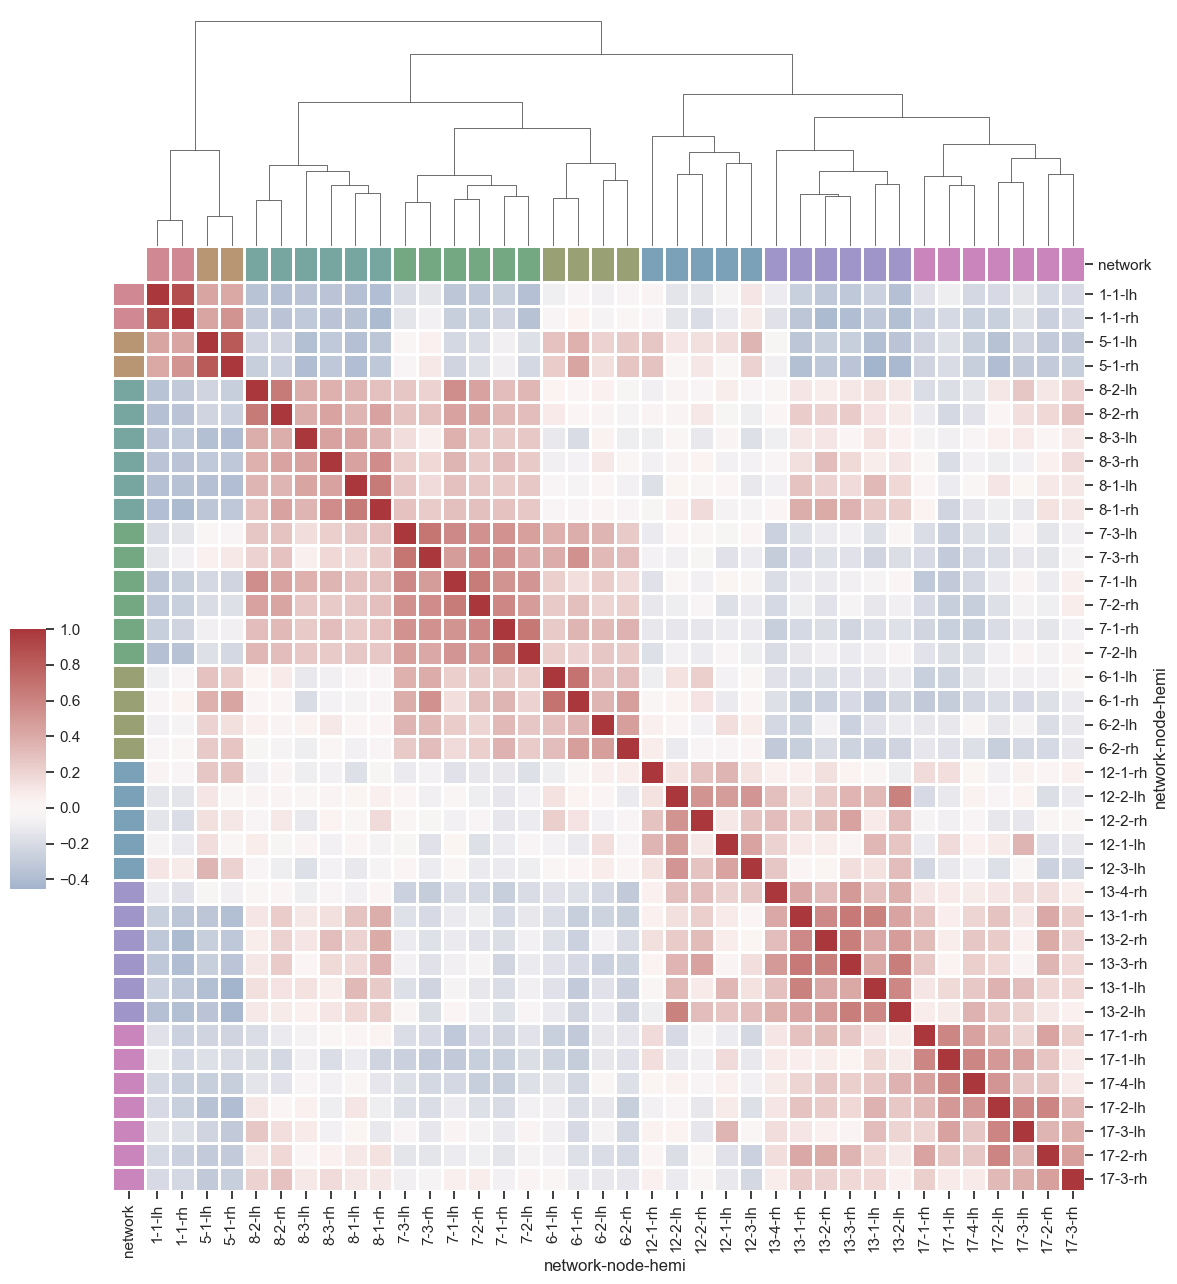

In [160]:
# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0, data_home="seaborn-data", cache=True)

# 选择networks网络的一个子集
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# 创建一个分类调色板来识别网络networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# 将调色板转化为将绘制在矩阵边的矢量
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# 绘制完整的图
g = sns.clustermap(df.corr(), center=0, cmap="vlag", 
                   row_colors=network_colors, col_colors=network_colors, 
                   dendrogram_ratio=(.1,.2),
                   cbar_pos=(.02, .31, .03, .2),
                   linewidths=.75, figsize=(12, 13))

g.ax_row_dendrogram.remove()